In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
vouchers = pd.read_csv("../data/vouchers.csv", index_col=0)
df = vouchers.query(" TAB3SMPL==1 & BOG95SMP==1 ") # データの絞り込み

In [3]:
df.head()

,ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,...,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
4,3.0,1,0,0,0.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,4.0,1,0,0,1.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6,5.0,1,0,0,0.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,6.0,1,0,0,0.0,12.0,10.0,0.0,7,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11,10.0,1,0,0,1.0,14.0,11.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
len(df)

1147

In [5]:
df.columns

Index(['ID', 'BOG95SMP', 'BOG97SMP', 'JAM93SMP', 'SEX', 'AGE', 'AGE2',
       'HSVISIT', 'SCYFNSH', 'INSCHL', 'PRSCH_C', 'PRSCHA_1', 'PRSCHA_2',
       'VOUCH0', 'BOG95ASD', 'BOG97ASD', 'JAM93ASD', 'DBOGOTA', 'DJAMUNDI',
       'D1995', 'D1997', 'RESPONSE', 'TEST_TAK', 'SEX_NAME', 'SVY', 'D1993',
       'PHONE', 'DAREA1', 'DAREA2', 'DAREA3', 'DAREA4', 'DAREA5', 'DAREA6',
       'DAREA7', 'DAREA8', 'DAREA9', 'DAREA10', 'DAREA11', 'DAREA12',
       'DAREA13', 'DAREA14', 'DAREA15', 'DAREA16', 'DAREA17', 'DAREA18',
       'DAREA19', 'DMONTH1', 'DMONTH2', 'DMONTH3', 'DMONTH4', 'DMONTH5',
       'DMONTH6', 'DMONTH7', 'DMONTH8', 'DMONTH9', 'DMONTH10', 'DMONTH11',
       'DMONTH12', 'BOG95', 'BOG97', 'MOM_SCH', 'MOM_AGE', 'MOM_MW', 'DAD_SCH',
       'DAD_AGE', 'DAD_MW', 'SEX2', 'STRATA1', 'STRATA2', 'STRATA3', 'STRATA4',
       'STRATA5', 'STRATA6', 'STRATAMS', 'REPT6', 'TOTSCYRS', 'HASCHILD',
       'MARRIED', 'WORKING', 'REPT', 'NREPT', 'FINISH6', 'FINISH7', 'FINISH8',
       'SEX_MISS', 'US

In [6]:
df.isnull().sum()

ID            0
BOG95SMP      0
BOG97SMP      0
JAM93SMP      0
SEX           0
AGE           0
AGE2         54
HSVISIT       0
SCYFNSH       0
INSCHL        0
PRSCH_C       0
PRSCHA_1      0
PRSCHA_2      0
VOUCH0        0
BOG95ASD      0
BOG97ASD      0
JAM93ASD      0
DBOGOTA       0
DJAMUNDI      0
D1995         0
D1997         0
RESPONSE      0
TEST_TAK      0
SEX_NAME     15
SVY           0
D1993         0
PHONE         0
DAREA1        0
DAREA2        0
DAREA3        0
           ... 
BOG97         0
MOM_SCH     115
MOM_AGE      46
MOM_MW       59
DAD_SCH     318
DAD_AGE     220
DAD_MW      299
SEX2          0
STRATA1       0
STRATA2       0
STRATA3       0
STRATA4       0
STRATA5       0
STRATA6       0
STRATAMS      0
REPT6         0
TOTSCYRS      0
HASCHILD      1
MARRIED       1
WORKING       0
REPT          0
NREPT         0
FINISH6       0
FINISH7       0
FINISH8       0
SEX_MISS      0
USNGSCH       0
HOURSUM       0
TAB3SMPL      0
WORKING3      0
Length: 89, dtype: int64

### 割引券の効果

In [7]:
"""
共変量の候補
介入から数年後の電話アンケートによってデータを集めたが、
電話に出て回答してくれるか否かに関わりそうなバイアスを選択する
"""
selection_bias = [
    'SVY',
    'HSVISIT',
    'AGE',
    'STRATA1',
    'STRATA2',
    'STRATA3',
    'STRATA4',
    'STRATA5',
    'STRATA6',
    'STRATAMS',
    'D1993',
    'D1995',
    'D1997',
    'DMONTH1',
    'DMONTH2',
    'DMONTH3',
    'DMONTH4',
    'DMONTH5',
    'DMONTH6',
    'DMONTH7',
    'DMONTH8',
    'DMONTH9',
    'DMONTH10',
    'DMONTH11',
    'DMONTH12',
    'SEX2'
]

z = ["VOUCH0"]

formula_y = [
    "TOTSCYRS",
    "INSCHL",
    "PRSCH_C",
    "USNGSCH",
    "PRSCHA_1",
    "FINISH6",
    "FINISH7",
    "FINISH8", 
    "REPT6", 
    "REPT", 
    "NREPT", 
    "MARRIED", 
    "HASCHILD", 
    "HOURSUM", 
    "WORKING3"
]

In [9]:
print(model.params["VOUCH0"])
print(model.pvalues["VOUCH0"])
print(model.bse["VOUCH0"])

0.0307483445412345
0.11985278252510236
0.019753852686186724


In [10]:
# まとめて回帰分析
models = {}
model_name = []
coef_base = []
std_error_base = []
pvalue_base = []
coef_cov = []
std_error_cov = []
pvalue_cov = []

for y_name in formula_y:
    y = df[y_name]
    
    # 共変量なしの介入変数だけ
    x_base = df[z]
    x_base = sm.add_constant(x_base) 
    model_base = sm.OLS(y, x_base).fit()
    coef_base.append(model_base.params["VOUCH0"])
    std_error_base.append(model_base.bse["VOUCH0"])
    pvalue_base.append(model_base.pvalues["VOUCH0"])
    models[y_name+"_base"] = model_base
    
    # 共変量を加えたもの
    x_cov = df[z+selection_bias]
    x_cov = sm.add_constant(x_cov) 
    model_cov = sm.OLS(y, x_cov).fit()
    coef_cov.append(model_cov.params["VOUCH0"])
    std_error_cov.append(model_cov.bse["VOUCH0"])
    pvalue_cov.append(model_cov.pvalues["VOUCH0"])
    models[y_name+"_cov"] = model_cov
    
    model_name.append(y_name)

In [11]:
df_results = pd.DataFrame({
    "coef_base" : coef_base,
    "std_error_base" : std_error_base,
    "pvalue_base" : pvalue_base,
    "coef_cov" : coef_cov,
    "std_error_cov" : std_error_cov,
    "pvalue_cov" : pvalue_cov,
})
df_results.index = model_name
df_results.head()

,coef_base,std_error_base,pvalue_base,coef_cov,std_error_cov,pvalue_cov
TOTSCYRS,0.058086,0.052353,2.674388e-01,0.033660,0.050910,5.086438e-01
INSCHL,0.018612,0.021641,3.899529e-01,0.006904,0.020288,7.337089e-01
PRSCH_C,0.159999,0.028291,1.962310e-08,0.153330,0.027775,4.198494e-08
USNGSCH,0.508872,0.023018,1.796250e-90,0.504160,0.022909,1.491107e-89
PRSCHA_1,0.062947,0.016873,2.003331e-04,0.057431,0.016965,7.358180e-04


In [12]:
print(df.query(" VOUCH0==0 ")["PRSCHA_1"].mean())
print(df.query(" VOUCH0==1 ")["PRSCHA_1"].mean())

0.8772241992882562
0.9401709401709402


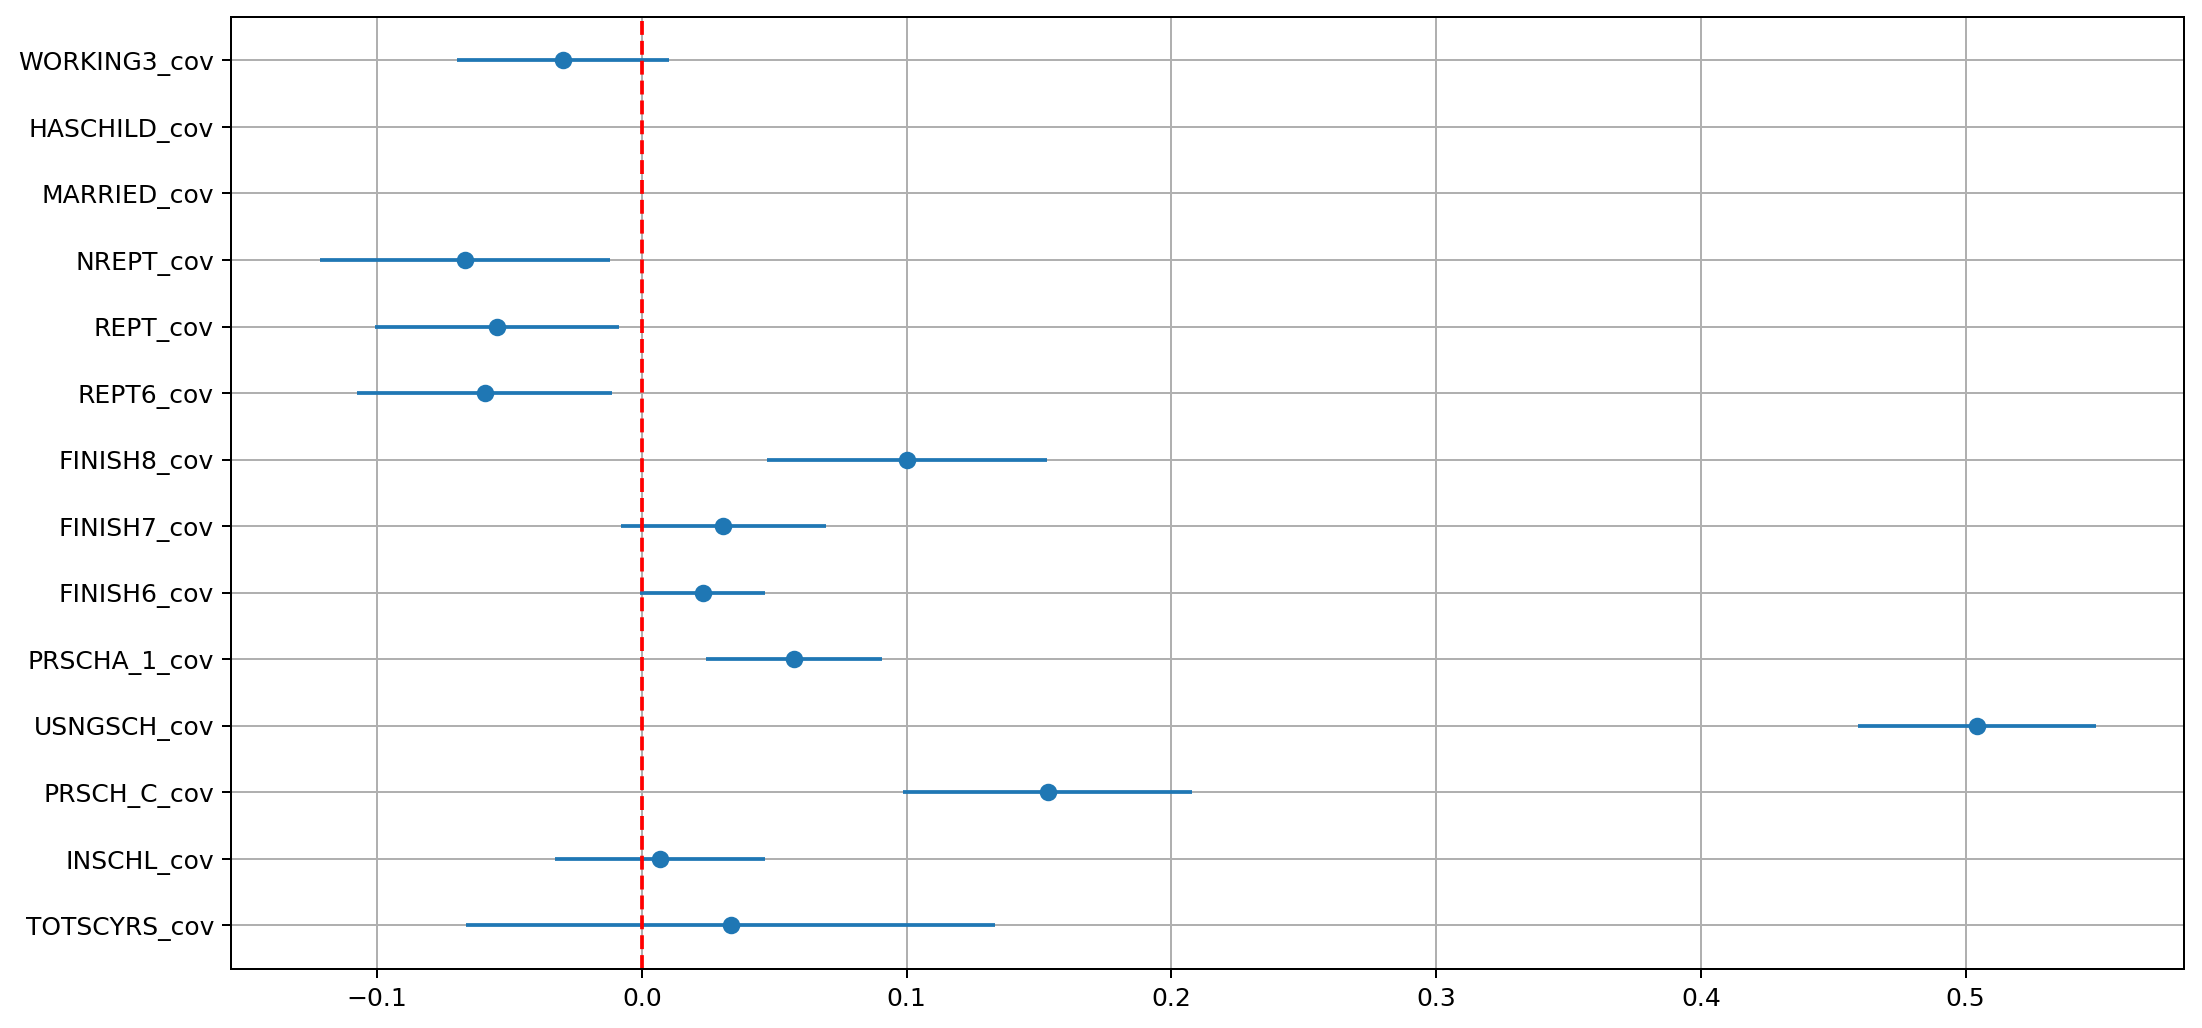

In [13]:
coefs = []
varnames = []
errors = []

for y in formula_y:
    if y == "HOURSUM":
        continue
    varname = y + "_cov"
    coef = models[varname].params["VOUCH0"]
    ci = models[varname].conf_int().loc["VOUCH0", 1]
    error = ci - coef
    
    coefs.append(coef)
    varnames.append(varname)
    errors.append(error)

fig = plt.figure(figsize=(14, 7), dpi=180)
ax = fig.add_subplot(111)
ax.errorbar(x=coefs, y=varnames, xerr=errors, fmt='o')
ax.axvline(0, color='red', linestyle="--") 
plt.grid()
plt.show()
plt.close()

In [14]:
print(df.query(" VOUCH0==0 ")["FINISH8"].mean())
print(df.query(" VOUCH0==1 ")["FINISH8"].mean())

0.6316725978647687
0.7435897435897436


### 性別による効果差

In [22]:
#data_tbl4_bog95
data_tbl4_bog95 = df.query(" BOG95SMP==1 & TAB3SMPL==1 ")\
.dropna(subset=["SCYFNSH", "FINISH6", "PRSCHA_1", "REPT6", "NREPT", "INSCHL", "FINISH7", "PRSCH_C", "FINISH8", "PRSCHA_2", "TOTSCYRS", "REPT"])\
[
    [
        'VOUCH0',
        'SVY',
        'HSVISIT',
        'DJAMUNDI',
        'PHONE',
        'AGE',
        'STRATA1',
        'STRATA2',
        'STRATA3',
        'STRATA4',
        'STRATA5',
        'STRATA6',
        'STRATAMS',
        'DBOGOTA',
        'D1993',
        'D1995',
        'D1997',
        'DMONTH1',
        'DMONTH2',
        'DMONTH3',
        'DMONTH4',
        'DMONTH5',
        'DMONTH6',
        'DMONTH7',
        'DMONTH8',
        'DMONTH9',
        'DMONTH10',
        'DMONTH11',
        'DMONTH12',
        'SEX_MISS',
        'FINISH6',
        'FINISH7',
        'FINISH8',
        'REPT6',
        'REPT',
        'NREPT',
        'SEX2',
        'TOTSCYRS',
        'MARRIED',
        'HASCHILD',
        'HOURSUM',
        'WORKING3',
        'INSCHL',
        'PRSCH_C',
        'USNGSCH',
        'PRSCHA_1'
    ]
]
data_tbl4_bog95.head()

,VOUCH0,SVY,HSVISIT,DJAMUNDI,PHONE,AGE,STRATA1,STRATA2,STRATA3,STRATA4,...,SEX2,TOTSCYRS,MARRIED,HASCHILD,HOURSUM,WORKING3,INSCHL,PRSCH_C,USNGSCH,PRSCHA_1
4,1.0,0.0,0.0,0,1,14.0,0,1,0,0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0,1,14.0,0,1,0,0,...,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0,1,14.0,1,0,0,0,...,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0,1,12.0,0,1,0,0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11,1.0,0.0,0.0,0,1,14.0,0,1,0,0,...,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [29]:
# 女子生徒のみを取り出す
df = data_tbl4_bog95.query(" SEX2==0 ")

# まとめて回帰分析
models_female = {}
model_name = []
coef_cov = []
std_error_cov = []
pvalue_cov = []

for y_name in formula_y:
    y = df[y_name]
    
    # 共変量を加えたもの
    x_cov = df[z+selection_bias]
    x_cov = sm.add_constant(x_cov) 
    model_cov = sm.OLS(y, x_cov).fit()
    coef_cov.append(model_cov.params["VOUCH0"])
    std_error_cov.append(model_cov.bse["VOUCH0"])
    pvalue_cov.append(model_cov.pvalues["VOUCH0"])
    models_female[y_name+"_cov"] = model_cov
    
    model_name.append(y_name)
    
df_results_female = pd.DataFrame({
    "coef_cov" : coef_cov,
    "std_error_cov" : std_error_cov,
    "pvalue_cov" : pvalue_cov,
})
df_results_female.index = model_name
df_results_female.head()

,coef_cov,std_error_cov,pvalue_cov
TOTSCYRS,0.090922,0.065853,1.679352e-01
INSCHL,0.034716,0.028060,2.165297e-01
PRSCH_C,0.171052,0.039443,1.718992e-05
USNGSCH,0.543600,0.031992,2.068478e-52
PRSCHA_1,0.022859,0.022599,3.122342e-01


In [30]:
# 男子生徒のみを取り出す
df = data_tbl4_bog95.query(" SEX2==1 ")

# まとめて回帰分析
models_male = {}
model_name = []
coef_cov = []
std_error_cov = []
pvalue_cov = []

for y_name in formula_y:
    y = df[y_name]
    
    # 共変量を加えたもの
    x_cov = df[z+selection_bias]
    x_cov = sm.add_constant(x_cov) 
    model_cov = sm.OLS(y, x_cov).fit()
    coef_cov.append(model_cov.params["VOUCH0"])
    std_error_cov.append(model_cov.bse["VOUCH0"])
    pvalue_cov.append(model_cov.pvalues["VOUCH0"])
    models_male[y_name+"_cov"] = model_cov
    
    model_name.append(y_name)
    
df_results_male = pd.DataFrame({
    "coef_cov" : coef_cov,
    "std_error_cov" : std_error_cov,
    "pvalue_cov" : pvalue_cov,
})
df_results_male.index = model_name
df_results_male.head()

,coef_cov,std_error_cov,pvalue_cov
TOTSCYRS,-0.028629,0.078126,7.141755e-01
INSCHL,-0.019509,0.029644,5.107469e-01
PRSCH_C,0.136347,0.039718,6.418748e-04
USNGSCH,0.467673,0.033029,4.557167e-39
PRSCHA_1,0.090172,0.025363,4.099666e-04


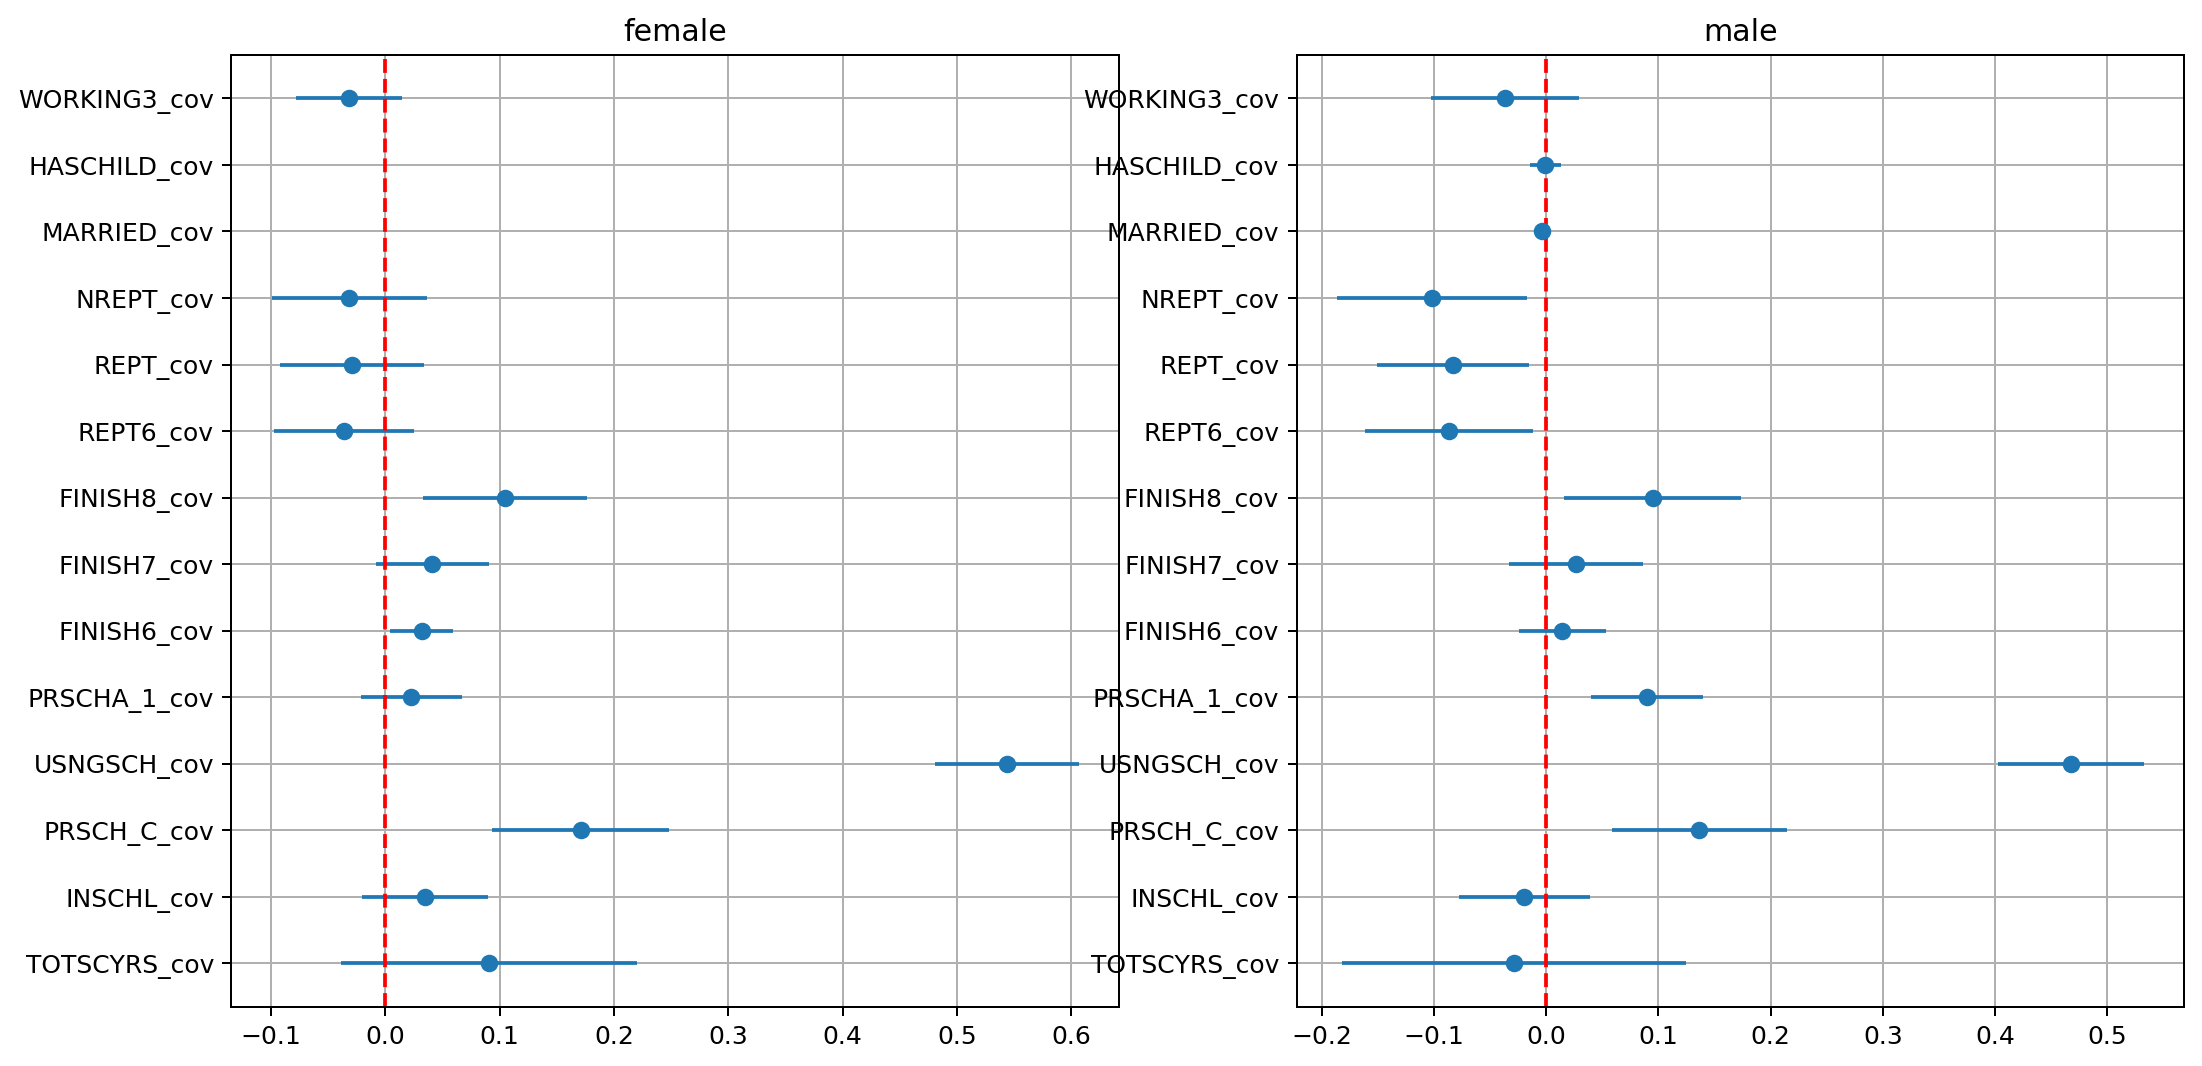

In [39]:
coefs_female = []
varnames_female = []
errors_female = []
coefs_male = []
varnames_male = []
errors_male = []

for y in formula_y:
    if y == "HOURSUM":
        continue
    varname = y + "_cov"
    coef = models_female[varname].params["VOUCH0"]
    ci = models_female[varname].conf_int().loc["VOUCH0", 1]
    error = ci - coef
    
    coefs_female.append(coef)
    varnames_female.append(varname)
    errors_female.append(error)
    
    coef = models_male[varname].params["VOUCH0"]
    ci = models_male[varname].conf_int().loc["VOUCH0", 1]
    error = ci - coef
    
    coefs_male.append(coef)
    varnames_male.append(varname)
    errors_male.append(error)
    
fig = plt.figure(figsize=(14, 7), dpi=180)
ax = fig.add_subplot(121)
ax.errorbar(x=coefs_female, y=varnames_female, xerr=errors_female, fmt='o')
ax.axvline(0, color='red', linestyle="--") 
ax.set_title("female")
plt.grid()
ax = fig.add_subplot(122)
ax.errorbar(x=coefs_male, y=varnames_male, xerr=errors_male, fmt='o')
ax.axvline(0, color='red', linestyle="--") 
ax.set_title("male")
plt.grid()
plt.show()
plt.close()